In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



In [2]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
m_df = pd.read_csv(mouse_drug_data_to_load)
ct_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
cp_df = pd.merge(m_df,ct_df)

# Display the data table for preview
cp_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [19]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
gb1 = cp_df.groupby(['Drug','Timepoint'])
gb1_agg = gb1.agg({
    'Tumor Volume (mm3)':['mean']
})

# Convert to DataFrame
mv_bdt = pd.DataFrame(gb1_agg)
# Preview DataFrame
mv_bdt.head()

Tumor Volume (mm3)
                                  mean
Drug      Timepoint                   
Capomulin 0                  45.000000
          5                  44.266086
          10                 43.084291
          15                 42.064317
          20                 40.716325

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
gb2 = cp_df.groupby(['Drug','Timepoint'])
gb2_agg = gb2.agg({
    'Tumor Volume (mm3)':['sem']
})
# Convert to DataFrame
sem_gdt = pd.DataFrame(gb2_agg)
# Preview DataFrame
sem_gdt.head()



Tumor Volume (mm3)
                                   sem
Drug      Timepoint                   
Capomulin 0                   0.000000
          5                   0.448593
          10                  0.702684
          15                  0.838617
          20                  0.909731

In [20]:
# Minor Data Munging to Re-Format the Data Frames
df3 = pd.pivot_table(mv_bdt,index='Timepoint',columns='Drug')
df4 = pd.pivot_table(sem_gdt,index='Timepoint',columns='Drug')

df3.columns = df3.columns.droplevel()
df3.columns = df3.columns.droplevel()

df4.columns = df4.columns.droplevel()
df4.columns = df4.columns.droplevel()
# Preview that Reformatting worked
df3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


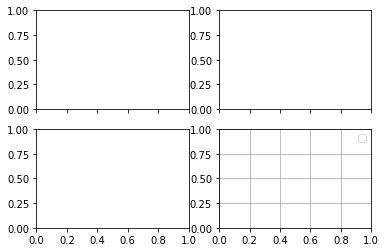

In [6]:
# Generate the Plot (with Error Bars)
fig, axes = plt.subplots(2,2,sharex=True)

# Save the Figure
plt.grid()
plt.legend(loc='best')

In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [10]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [11]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [13]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [14]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [16]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()